# Loan Case Study


## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [82]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

## 2. Loading the data into the data frame.

In [83]:
path = "/Users/bhavana/Downloads/loan.csv"  
loan = pd.read_csv(path)
# To display the top 5 rows 
df.head(5)  

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


## 3. Checking the types of data

In [84]:
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
total_acc                    int64
initial_list_status 

## 4. Dropping irrelevant columns

In [85]:
df.shape

(39717, 43)

In [86]:
100*df.isnull().mean()
#percentage of missing value

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_py

In [87]:
#Remove all columns which contain Nil values
df = df.dropna(axis=1, how='any')
df.to_csv("loan.csv", index=False)


In [88]:
df.shape


(39717, 43)

In [89]:
df["annual_inc"] = pd.to_numeric(df["annual_inc"], errors='coerce')

In [90]:
df["annual_inc"].value_counts()

60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: annual_inc, Length: 5318, dtype: int64

In [91]:
cat_cols = ["term", "verification_status", "loan_status"]
cont_cols = ["loan_amnt", "funded_amnt_inv" ]
#extra_cols = ["PassengerId", "Name", "Ticket"]
len(cat_cols)+len(cont_cols)

5

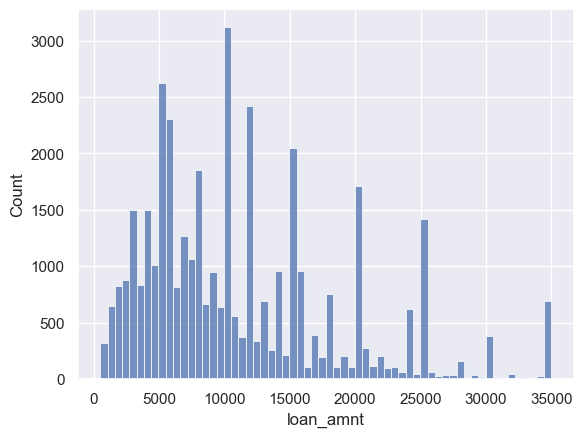

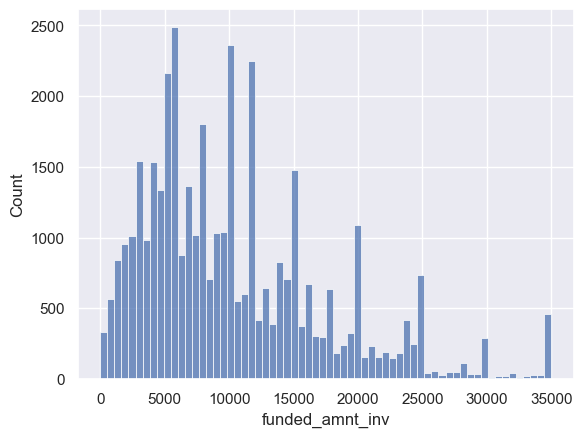

In [92]:
#Univariate Analysis - Numeric
for col in cont_cols:
    sns.histplot(x=df[col])
    plt.show()

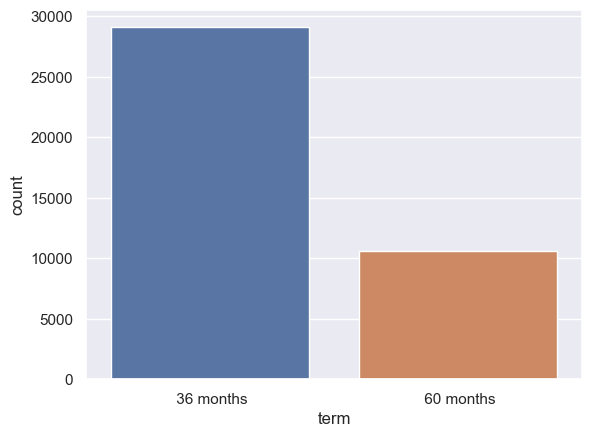

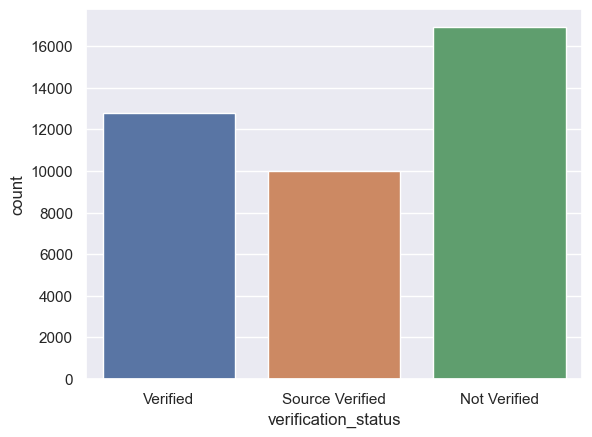

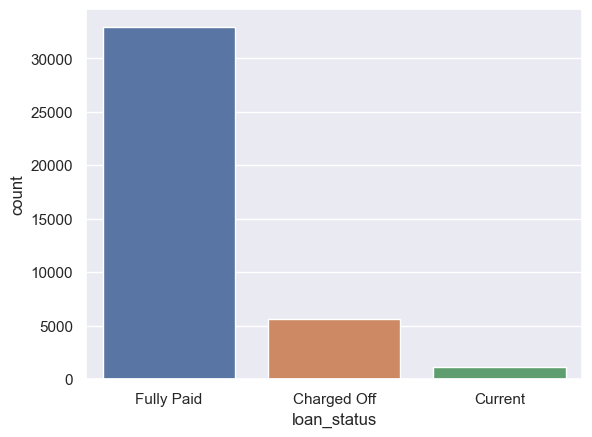

In [93]:
#Univariate Analysis - Categorical 
for cat in cat_cols:
    sns.countplot(x=df[cat])
    plt.show()

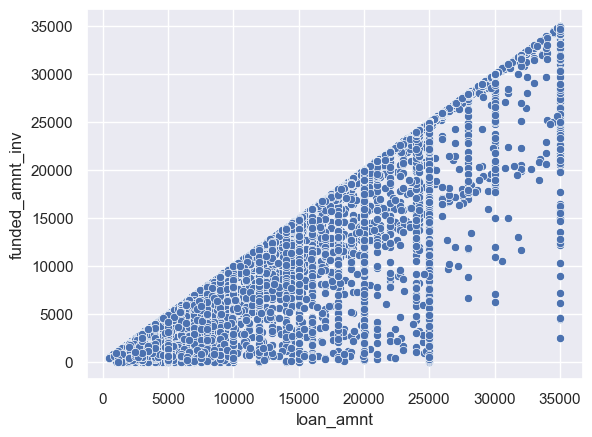

In [95]:
#Bivariate Analysis - Numeric
sns.scatterplot(x=df["loan_amnt"], y=df["funded_amnt_inv"])
plt.show()

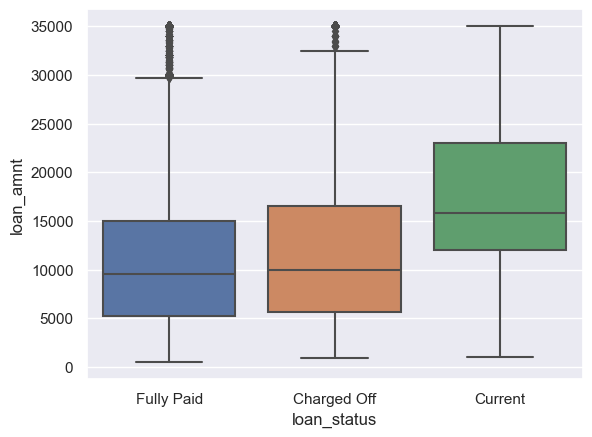

In [96]:
sns.boxplot(x=df["loan_status"], y=df["loan_amnt"])
plt.show()
#x-> Cat, y-> Num

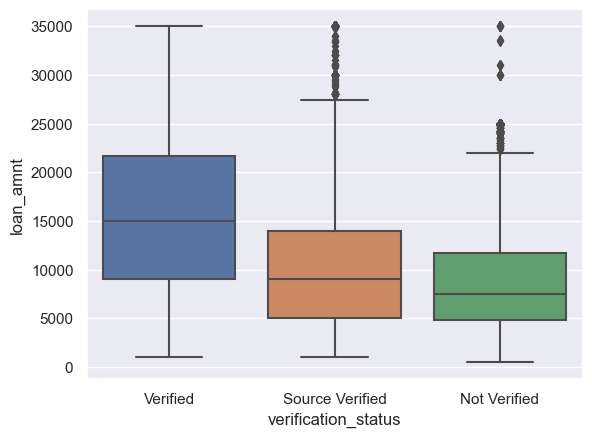

In [97]:
sns.boxplot(x=df["verification_status"], y=df["loan_amnt"])
plt.show()
#x-> Cat, y-> Num